In [1]:
from skimage import color,io,filters,morphology,util
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack as fp

In [2]:
"""
helper.py
Contains helper function for image processing in frequency domain.
Includes meshgrid, lowpass filter, highpass filter, notch filter, and paddedsize.

Inherited from Asdos Pengolahan Citra Ganjil 2019/2020
Edited by Asdos Pengolahan Citra Ganjil 2020/2021
"""

import numpy as np

def dftuv(M, N):
    """ DFTUV Computes meshgrid frequency matrices.
    [U, V] = DFTUV(M, N) computes meshgrid frequency matrices U and
    V. U and V are useful for computing frequency-domain filter 
    functions that can be used with DFTFILT. U and V are both M-by-N. """

    # Set up range of variables.
    u = np.arange(M)
    v = np.arange(N)

    # Compute the indices for use in meshgrid
    for i in range(M//2+1, M):
        u[i] = u[i] - M
    for i in range(N//2+1, N):
        v[i] = v[i] - N

    # Return the meshgrid arrays
    return np.meshgrid(v,u)

def lpfilter(tipe, M, N, D0, n = 1): 
    """ LPFILTER Computes frequency domain lowpass filters
    H = LPFILTER(TYPE, M, N, D0, n) creates the transfer function of
    a lowpass filter, H, of the specified TYPE and size (M-by-N).  To
    view the filter as an image or mesh plot, it should be centered
    using H = fftshift(H).
 
    Valid values for TYPE, D0, and n are:
 
    'ideal'    Ideal lowpass filter with cutoff frequency D0.  n need
               not be supplied.  D0 must be positive
 
    'btw'      Butterworth lowpass filter of order n, and cutoff D0.
               The default value for n is 1.0.  D0 must be positive.

    'gaussian' Gaussian lowpass filter with cutoff (standard deviation)
 	           D0.  n need not be supplied.  D0 must be positive. """

    # Use function dftuv to set up the meshgrid arrays needed for 
    # computing the required distances.
    U, V = dftuv(M, N)

    # Compute the distances D(U, V).
    D = np.sqrt(U**2+V**2)

    # Begin fiter computations.
    if (tipe == 'gaussian'):
        return np.exp(-(D**2)/(2*(D0**2)))
    elif (tipe == 'btw'):
        return 1/(1 + (D/D0)**(2*n))
    elif (tipe == 'ideal'):
        return (D <= D0)
    else:
        print("Invalid type.")

def hpfilter(tipe, M, N, D0, n = 1):
    """ HPFILTER Computes frequency domain highpass filters
    H = HPFILTER(TYPE, M, N, D0, n) creates the transfer function of
    a highpass filter, H, of the specified TYPE and size (M-by-N).
    Valid values for TYPE, D0, and n are:
 
    'ideal'     Ideal highpass filter with cutoff frequency D0.  n
                need not be supplied.  D0 must be positive
 
    'btw'       Butterworth highpass filter of order n, and cutoff D0.
                The default value for n is 1.0.  D0 must be positive.
 
    'gaussian'  Gaussian highpass filter with cutoff (standard deviation)
                D0.  n need not be supplied.  D0 must be positive. """
 

    # The transfer function Hhp of a highpass filter is 1 - Hlp,
    # where Hlp is the transfer function of the corresponding lowpass
    # filter.  Thus, we can use function lpfilter to generate highpass
    # filters.
	
    # Generate highpass filter.
    Hlp = lpfilter(tipe, M, N, D0, n)
    return 1 - Hlp

def notch(tipe, M, N, D0, x, y, n = 1):
    """ notch Computes frequency domain notch filters
    H = NOTCH(TYPE, M, N, D0, x, y, n) creates the transfer function of
    a notch filter, H, of the specified TYPE and size (M-by-N). centered at
    Column X, Row Y in an unshifted Fourier spectrum.
    Valid values for TYPE, D0, and n are:
 
    'ideal'     Ideal highpass filter with cutoff frequency D0.  n
                need not be supplied.  D0 must be positive
 
    'btw'       Butterworth highpass filter of order n, and cutoff D0.
                The default value for n is 1.0.  D0 must be positive.
 
    'gaussian'  Gaussian highpass filter with cutoff (standard deviation)
                D0.  n need not be supplied.  D0 must be positive. """

    # The transfer function Hhp of a highpass filter is 1 - Hlp,
    # where Hlp is the transfer function of the corresponding lowpass
    # filter.  Thus, we can use function lpfilter to generate highpass
    # filters.

    # Generate highpass filter.
    Hlp = lpfilter(tipe, M, N, D0, n)
    H = 1 - Hlp
    H = np.roll(H, y-1, axis=0)
    H = np.roll(H, x-1, axis=1)
    return H

def paddedsize(w, l):
    """ PADDEDSIZE Computes padded sizes useful for FFT-based filtering.
    PQ = PADDEDSIZE(AB), where AB is a two-element size vector,
    computes the two-element size vector PQ = 2*AB. """

    return (2*w, 2*l)

# Soal1
### Terapkan minimal 2 Low Pass dan 2 High Pass Filter terhadap citra building.jpg, gunakan dua nilai D0 yang berbeda pada masing-masing filter!

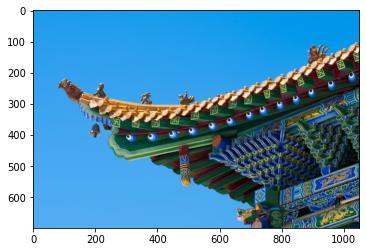

In [3]:
building = io.imread('bulding.jpg')
plt.imshow(building)
plt.show()

### a. Tampilkan citra tersebut pada domain frekuensi!

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.


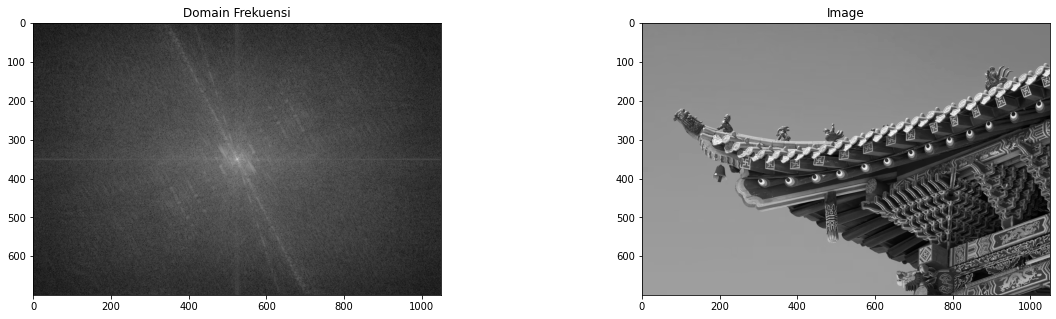

In [4]:
building2 = color.rgb2gray(building)

# Calculate DFT
# ft contains imaginary and real numbers
ft = fp.fft2(building2)

# Calculate magnitude of imaginary and real numbers
ft_norm = abs(ft)

# Scale image
ft_scale = np.log(1 + ft_norm)

# Shift low frequency to the center of image
ft_shift = fp.fftshift(ft_scale)

ift = fp.ifft2(ft).real

plt.figure(figsize=(20,5))
plt.subplot(1,2,1); plt.imshow(ft_shift,cmap='gray');plt.title("Domain Frekuensi");
plt.subplot(1,2,2); plt.imshow(ift,cmap='gray');plt.title("Image");
plt.show()

### b. Tampilkan citra pada domain spasial dan domain frekuensi dari citra hasil penerapan Low Pass Filter dan jelaskan perbedaannya!


In [5]:
w, l = paddedsize(building2.shape[0], building2.shape[1])

# Create gaussian lowpass filter
h = lpfilter('gaussian', w, l, 0.05 * w)
h2 = lpfilter('gaussian', w, l, 0.1 * w)
i = lpfilter('ideal', w, l, 0.05 * w)
i2 = lpfilter('ideal', w, l, 0.1 * w)

# Calculate DFT
f = fp.fft2(building2,(w,l))

# Apply lowpass filter
LPFS_building = h * f
LPFS_building2 = h2 * f
LPFS_building3 = i * f
LPFS_building4 = i2 * f

# Calculate IDFT for spatial domain transformation
LPF_building = fp.ifft2(LPFS_building).real
LPF_building = LPF_building[:building2.shape[0],:building2.shape[1]]
LPF_building2 = fp.ifft2(LPFS_building2).real
LPF_building2 = LPF_building2[:building2.shape[0],:building2.shape[1]]
LPF_building3 = fp.ifft2(LPFS_building3).real
LPF_building3 = LPF_building3[:building2.shape[0],:building2.shape[1]]
LPF_building4 = fp.ifft2(LPFS_building4).real
LPF_building4 = LPF_building4[:building2.shape[0],:building2.shape[1]]


# Shifting for fourier spectrum display
Fc = fp.fftshift(f)
Fcf = fp.fftshift(LPFS_building)
Fcf2 = fp.fftshift(LPFS_building2)
Fcf3 = fp.fftshift(LPFS_building3)
Fcf4 = fp.fftshift(LPFS_building4)

# Scaling for fourier spectrum display
S = np.log(1+abs(Fc))
S1= np.log(1+abs(Fcf))
S2= np.log(1+abs(Fcf2))
S3= np.log(1+abs(Fcf3))
S4= np.log(1+abs(Fcf4))

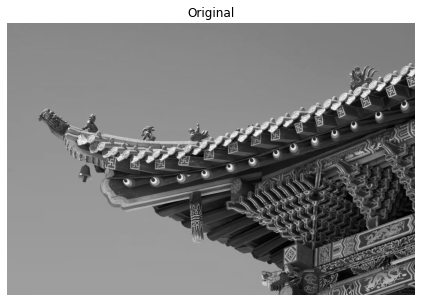

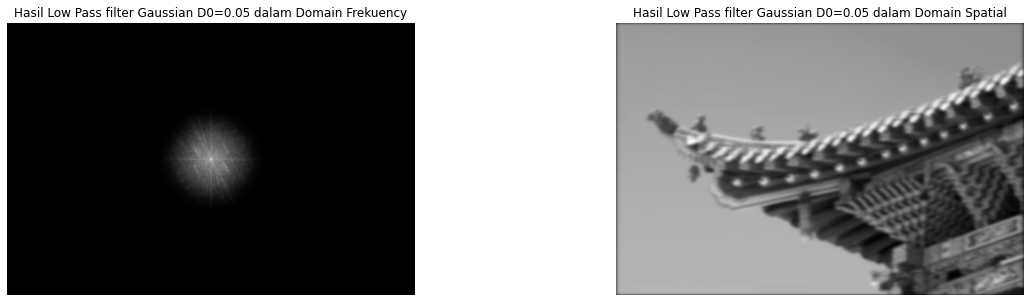

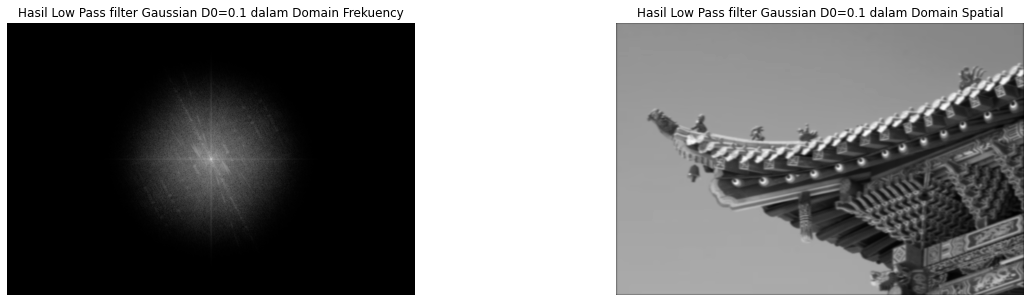

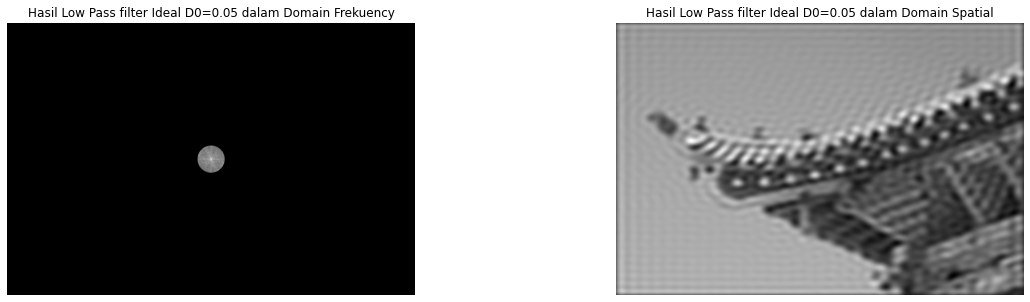

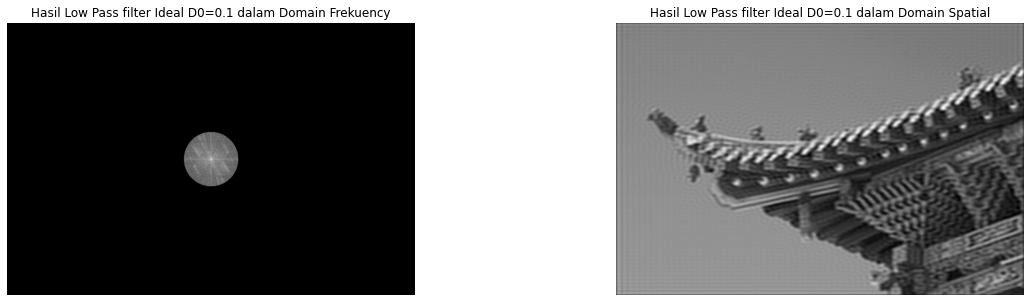

In [6]:
plt.figure(figsize=(20,5))
plt.imshow(building2, cmap='gray');plt.title("Original");plt.axis("off");
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,2,1);plt.imshow(S1, cmap='gray');plt.title("Hasil Low Pass filter Gaussian D0=0.05 dalam Domain Frekuency");plt.axis("off")
plt.subplot(1,2,2);plt.imshow(LPF_building, cmap='gray');plt.title("Hasil Low Pass filter Gaussian D0=0.05 dalam Domain Spatial");plt.axis("off")
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,2,1);plt.imshow(S2, cmap='gray');plt.title("Hasil Low Pass filter Gaussian D0=0.1 dalam Domain Frekuency");plt.axis("off")
plt.subplot(1,2,2);plt.imshow(LPF_building2, cmap='gray');plt.title("Hasil Low Pass filter Gaussian D0=0.1 dalam Domain Spatial");plt.axis("off")
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,2,1);plt.imshow(S3, cmap='gray');plt.title("Hasil Low Pass filter Ideal D0=0.05 dalam Domain Frekuency");plt.axis("off")
plt.subplot(1,2,2);plt.imshow(LPF_building3, cmap='gray');plt.title("Hasil Low Pass filter Ideal D0=0.05 dalam Domain Spatial");plt.axis("off")
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,2,1);plt.imshow(S4, cmap='gray');plt.title("Hasil Low Pass filter Ideal D0=0.1 dalam Domain Frekuency");plt.axis("off")
plt.subplot(1,2,2);plt.imshow(LPF_building4, cmap='gray');plt.title("Hasil Low Pass filter Ideal D0=0.1 dalam Domain Spatial");plt.axis("off")
plt.show()

> Dari hasil diatas terlihat bahwa pada hasil low pass filter gaussian citra lebih jelas  dibandingkan ideal low pass filter.
Ideal low pass filter membuat gambar menjadi ada noisy. 

### c.Tampilkan citra pada domain spasial dan domain frekuensi dari citra hasil penerapan High Pass Filter dan jelaskan perbedaannya!

In [7]:
w, l = paddedsize(building2.shape[0], building2.shape[1])

# Create gaussian highpass filter
h = hpfilter('gaussian', w, l, 0.05 * w)
h2 = hpfilter('gaussian', w, l, 0.1 * w)
i = hpfilter('ideal', w, l, 0.05 * w)
i2 = hpfilter('ideal', w, l, 0.1 * w)

# Calculate DFT
f = fp.fft2(building2,(w,l))

# Apply highpass filter
LPFS_building = h*f
LPFS_building2 = h2*f
LPFS_building3 = i*f
LPFS_building4 = i2*f

# Calculate IDFT for spatial domain transformation
LPF_building = fp.ifft2(LPFS_building).real
LPF_building = LPF_building[:building2.shape[0],:building2.shape[1]]
LPF_building2 = fp.ifft2(LPFS_building2).real
LPF_building2 = LPF_building2[:building2.shape[0],:building2.shape[1]]
LPF_building3 = fp.ifft2(LPFS_building3).real
LPF_building3 = LPF_building3[:building2.shape[0],:building2.shape[1]]
LPF_building4 = fp.ifft2(LPFS_building4).real
LPF_building4 = LPF_building4[:building2.shape[0],:building2.shape[1]]

# Shifting for fourier spectrum display
Fc = fp.fftshift(f)
Fcf = fp.fftshift(LPFS_building)
Fcf2 = fp.fftshift(LPFS_building2)
Fcf3 = fp.fftshift(LPFS_building3)
Fcf4 = fp.fftshift(LPFS_building4)

# Scaling for fourier spectrum display
S = np.log(1+abs(Fc))
S1 = np.log(1+abs(Fcf))
S2 = np.log(1+abs(Fcf2))
S3 = np.log(1+abs(Fcf3))
S4 = np.log(1+abs(Fcf4))

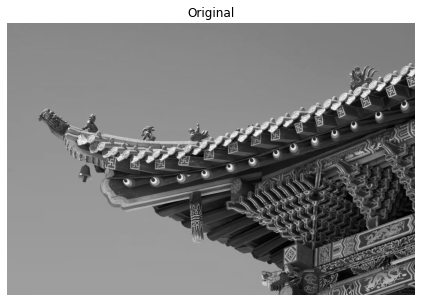

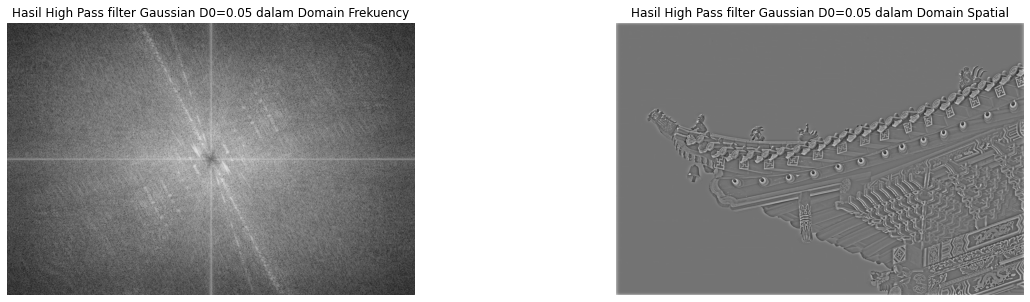

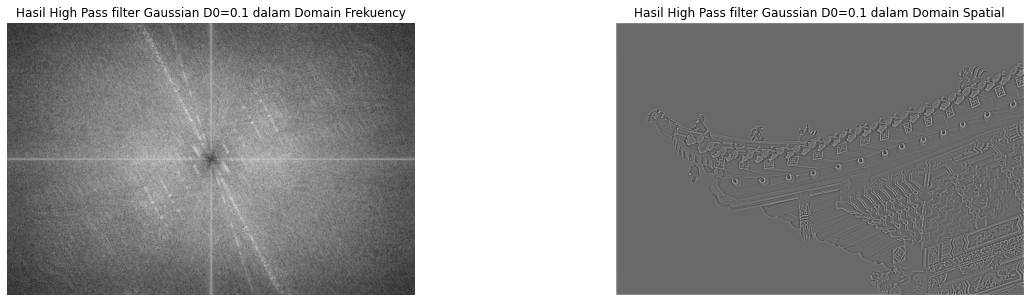

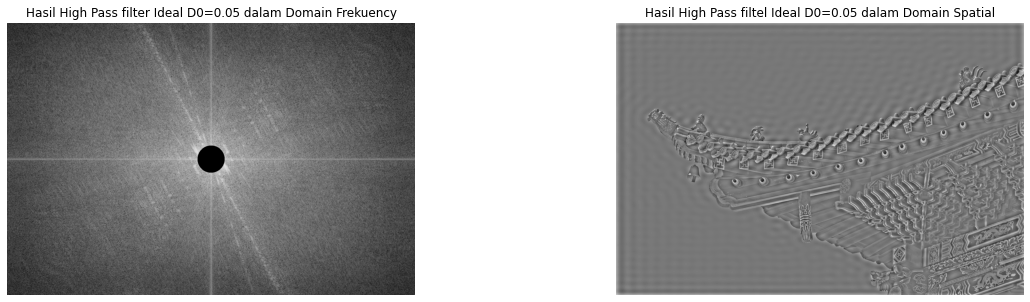

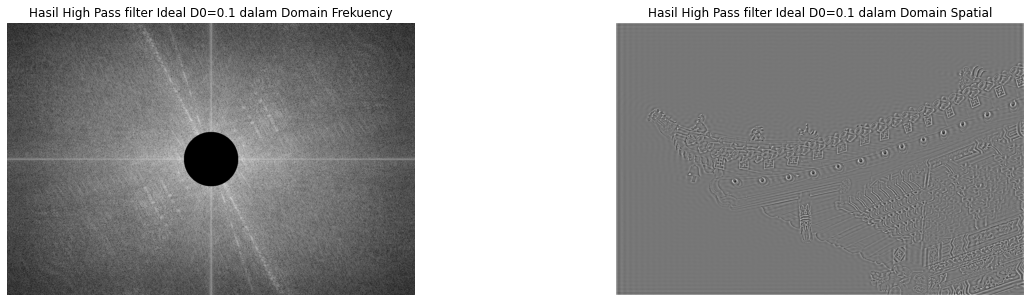

In [8]:
plt.figure(figsize=(20,5))
plt.imshow(building2, cmap='gray');plt.title("Original");plt.axis("off");
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,2,1);plt.imshow(S1, cmap='gray');plt.title("Hasil High Pass filter Gaussian D0=0.05 dalam Domain Frekuency");plt.axis("off")
plt.subplot(1,2,2);plt.imshow(LPF_building, cmap='gray');plt.title("Hasil High Pass filter Gaussian D0=0.05 dalam Domain Spatial");plt.axis("off")
plt.show()


plt.figure(figsize=(20,5))
plt.subplot(1,2,1);plt.imshow(S2, cmap='gray');plt.title("Hasil High Pass filter Gaussian D0=0.1 dalam Domain Frekuency");plt.axis("off")
plt.subplot(1,2,2);plt.imshow(LPF_building2, cmap='gray');plt.title("Hasil High Pass filter Gaussian D0=0.1 dalam Domain Spatial");plt.axis("off")
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,2,1);plt.imshow(S3, cmap='gray');plt.title("Hasil High Pass filter Ideal D0=0.05 dalam Domain Frekuency");plt.axis("off")
plt.subplot(1,2,2);plt.imshow(LPF_building3, cmap='gray');plt.title("Hasil High Pass filtel Ideal D0=0.05 dalam Domain Spatial");plt.axis("off")
plt.show()


plt.figure(figsize=(20,5))
plt.subplot(1,2,1);plt.imshow(S4, cmap='gray');plt.title("Hasil High Pass filter Ideal D0=0.1 dalam Domain Frekuency");plt.axis("off")
plt.subplot(1,2,2);plt.imshow(LPF_building4, cmap='gray');plt.title("Hasil High Pass filter Ideal D0=0.1 dalam Domain Spatial");plt.axis("off")
plt.show()

>Dari hasil diatas terlihat bahwa pada hasil high pass filter gaussian citra lebih jelas  dibandingkan ideal high pass filter.
Ideal high pass filter membuat gambar menjadi ada noisy. 

### d.  Bagaimana pengaruh dari nilai D0 yang anda gunakan pada bagian (b) dan (c)?

<li> Untuk bagian b dapat dilihat bahwa pada lower pass filtering jika semakin besar nilai D0 maka akan memebuat citra menjadi lebih jelas dan sebaliknya jika makin kecil maka akan membuat citra menjadi lebih buram</li>
<li> Untuk bagian c dapat dilihat bahwa pada high pass filtering jika semakin kecil nilai D0 maka akan memebuat citra menjadi lebih jelas dan sebaliknya jika makin besar maka akan membuat citra menjadi lebih tidak terlihat sharpeningnya</li>

# Soal2

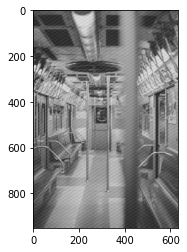

In [9]:
train = io.imread('train.jpg')
plt.imshow(train,cmap='gray')
plt.show()

### a. Tampilkan citra tersebut pada domain frekuensi!

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


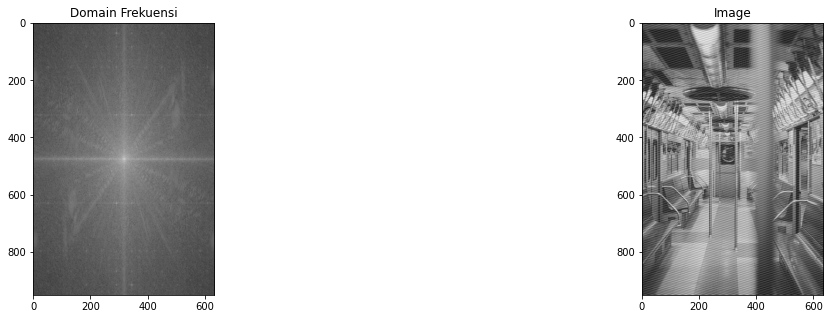

In [10]:
train = color.rgb2gray(train)

# Calculate DFT
# ft contains imaginary and real numbers
ft = fp.fft2(train)

# Calculate magnitude of imaginary and real numbers
ft_norm = abs(ft)

# Scale image
ft_scale = np.log(1 + ft_norm)

# Shift low frequency to the center of image
ft_shift = fp.fftshift(ft_scale)

ift = fp.ifft2(ft).real

plt.figure(figsize=(20,5))
plt.subplot(1,2,1); plt.imshow(ft_shift,cmap='gray');plt.title("Domain Frekuensi");
plt.subplot(1,2,2); plt.imshow(ift,cmap='gray');plt.title("Image");
plt.show()

### b. Lakukan filtering yang tepat untuk mereduksi noise yang ada dan jelaskan mengapa anda memilih melakukan filtering tersebut!

In [11]:
w, l = paddedsize(train.shape[0],train.shape[1])

# Calculate DFT
F = fp.fft2(util.img_as_float(train),(w,l))

# Scaling & Shifting for fourier spectrum display
Fc = fp.fftshift(F)
S1 = np.log(1+abs(Fc))


# Apply notch filter
# notch function is provided in helper.py
H1 = notch('btw', w, l, 10, -50, -305)
H2 = notch('btw', w, l, 10, 55, 310)
H3 = notch('btw', w, l, 10, -55, 310)
H4 = notch('btw', w, l, 10, 55, -305)

# Apply notch filter
FS_train = F*H1*H2*H3*H4
# Calculate IDFT for spatial domain transformation
F_train = fp.ifft2(FS_train).real
F_train = F_train[:train.shape[0],:train.shape[1]]

# Scaling & Shifting for fourier spectrum display
Fcf = fp.fftshift(FS_train)
S2 = np.log(1+abs(Fcf))

> Alasan memilih menggunakan Nocht Filtering adalah Notch Filtering dapat digunakan untuk menghilangkan noise "spektral" dari sebuah gambar. Ini dikenal sebagai band-stop filter dengan narrow stopband. Ini akan melemahkan frekuensi tertentu yang dipilih (dan 
beberapa tetangganya) dan membiarkan frekuensi lain melewatinya. Oleh karena itu, dengan teknik seperti itu dapat membuat gambar menjadi lebih jelas dan menghilangkan noise.

### c. Tampilkan perbandingan citra sebelum dan sesudah filtering pada domain spasial dan frekuensi serta ceritakan hasilnya!

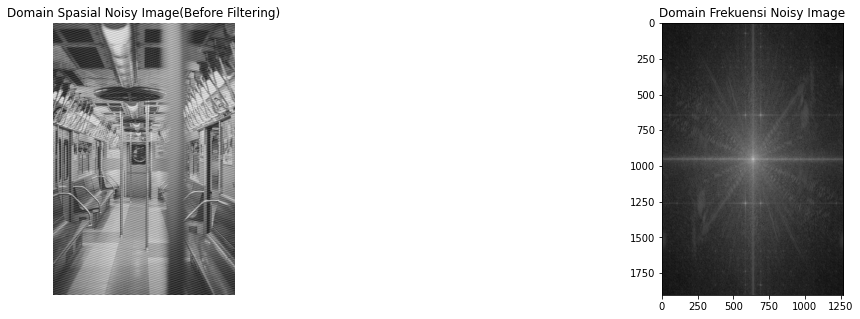

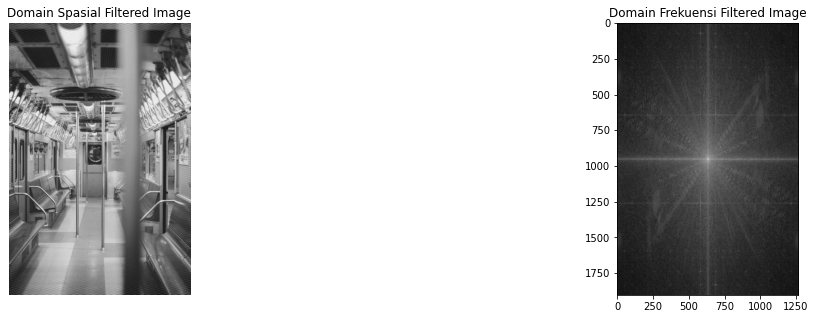

In [12]:
# Show image
plt.figure(figsize=(20,5))
plt.subplot(1,2,1); plt.imshow(train, cmap='gray');plt.title('Domain Spasial Noisy Image(Before Filtering)'); plt.axis("off");
plt.subplot(1,2,2); plt.imshow(S1, cmap='gray');plt.title('Domain Frekuensi Noisy Image');
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,2,1); plt.imshow(F_train, cmap='gray');plt.title('Domain Spasial Filtered Image');plt.axis("off");
plt.subplot(1,2,2); plt.imshow(S2, cmap='gray');plt.title('Domain Frekuensi Filtered Image');
plt.show()


> Dari hasil citra diatas terlihat bahwa ketika kita menghilangkan noise dengan nocht filtering membuat citra menjadi lebih jelas. Kita perlu menutupi noisy yang terlihat pada domain frekuensi dengan titik hitam hsil dari notch dan kita sesuaikan koordinatnya sehingga dapat menutupi noisy/titik putih yang ada di domain frekuensi.